### Inspection of baseline feature extraction

#### 1. How to extract features for a specific day

In [1]:
# Standard libraries and path setting
import os
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import parse module
from utils import parse

In [3]:
# Use parse_dtypes to get data for a patient

all_data = parse.parse_dtypes(track=1, patient=1, mode='train', num=1, dtypes=['hrm', 'linacc', 'gyr'])

In [4]:
# Basic inspection
print(type(all_data))
print(all_data.keys())

all_data['hrm'].head(5)      

<class 'dict'>
dict_keys(['hrm', 'linacc', 'gyr'])


,heartRate,rRInterval,time,day_index
0,0,0,0 days 13:16:35.114235,2
1,-3,0,0 days 13:16:35.314217,2
2,-3,0,0 days 13:16:35.513781,2
3,-3,0,0 days 13:16:35.712891,2
4,-3,0,0 days 13:16:35.914296,2


In [5]:
from preprocess.baseline_feature_extraction import extract_day_features
# Get features for day = 2
feat_day2 = extract_day_features(all_data, day_index=2)

/home/christos/projects/e-prevention-challenge/preprocess/baseline_feature_extraction.py:87: FutureWarning: The provided callable <function nanmean at 0x7ff9841bd5e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_hrm = df_hrm.groupby(pd.Grouper(key='DateTime', freq='5Min')).agg({


In [6]:
feat_day2.head(5)

,DateTime,heartRate_nanmean,rRInterval_nanmean,rRInterval_rmssd,rRInterval_sdnn,rRInterval_lombscargle_power_high,sin_t,cos_t,acc_mean,acc_std,acc_delta_mean,acc_delta_std,gyr_mean,gyr_std,gyr_delta_mean,gyr_delta_std
55,2023-11-17 17:50:00,89.305893,649.120080,53.958095,151.876286,0.017861,-0.999048,-0.043619,0.259440,0.024687,-1.102904e-05,0.000070,0.305597,0.133557,-0.000298,0.000897
56,2023-11-17 17:55:00,84.958716,700.663776,65.303456,146.247131,0.121452,-0.999762,-0.021815,0.258452,0.026367,1.632174e-07,0.000061,0.264187,0.130540,-0.000057,0.001015
59,2023-11-17 18:10:00,82.291667,681.179453,55.659087,168.206694,0.251268,-0.999048,0.043619,0.415226,0.901135,-2.109979e-04,0.015201,0.839766,1.917360,0.001504,0.025484
60,2023-11-17 18:15:00,77.978652,770.969980,37.684305,79.598096,0.001308,-0.997859,0.065403,0.200520,0.026057,1.555219e-05,0.000121,0.818816,0.637188,0.000053,0.004220
61,2023-11-17 18:20:00,80.490994,745.445630,30.838678,66.919198,0.001766,-0.996195,0.087156,0.199969,0.032281,-7.148037e-06,0.000244,0.880336,0.927020,-0.000115,0.010985


#### 2. Extracted Features (Definitions)

[1] `DateTime`: Holds the exact time to the corresponding extracted features. Date is irrelevant, is just a convention to convert the dtype to datetime.

[2] `heartRate_nanmean`: The mean heart rate for the corresponding 5Min window (baseline ICASSP).

[3] `rRinterval_nanmean`: The mean RRinterval values in the corresponding 5Min window (baseline ICASSP).


[4] `rRinterval_rmssd`: Same as the baselines of ICASSP.

[5] `rRinterval_sdnn`: Same as the baselines of ICASSP.

[6] `rRinterval_lombscargle_power_high`: Same as the baselines of ICASSP.

[7] `sin_t`: Time encoding from DateTime

[8] `cos_t`: Time encoding from DateTime

[9] `acc_mean`: Mean norm acceleration in 5Min window.

[10] `acc_std`: Std of [9]

[11] `acc_delta_mean`: Deltas of [9] (first aggregated on 30 - sec windows)

[12] `acc_delta_std`: stds of deltas

[13] - [16]: features from gyroscope (same as acc).

#### 3. Visualizing for Relapse and non relapse days

In [7]:
# Find a relapse day for the given patient
relapses = parse.get_relapses(track=1, patient=1, num=1)

relapses.head(5)

,relapse,day_index
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4


In [8]:
# Get all data for track_01/P1/val_1
all_data = parse.parse_dtypes(track=1, patient=1, mode="val", num=1, dtypes=['hrm', 'linacc', 'gyr'])

In [9]:
# extract features for day 2 (relapse day)
feat_relapses = extract_day_features(all_data, day_index=2)

feat_relapses.head(5)

/home/christos/projects/e-prevention-challenge/preprocess/baseline_feature_extraction.py:87: FutureWarning: The provided callable <function nanmean at 0x7ff9841bd5e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_hrm = df_hrm.groupby(pd.Grouper(key='DateTime', freq='5Min')).agg({


,DateTime,heartRate_nanmean,rRInterval_nanmean,rRInterval_rmssd,rRInterval_sdnn,rRInterval_lombscargle_power_high,sin_t,cos_t,acc_mean,acc_std,acc_delta_mean,acc_delta_std,gyr_mean,gyr_std,gyr_delta_mean,gyr_delta_std
1,2023-11-17 07:55:00,96.566868,725.367578,173.979306,302.478053,0.004731,0.876727,-0.480989,2.280206,2.660628,0.005606,0.042409,8.351057,6.308624,0.020459,0.126906
2,2023-11-17 08:00:00,111.537008,652.030687,241.322226,313.581844,0.004080,0.866025,-0.500000,3.008613,2.977924,-0.000183,0.042811,9.614506,7.470293,-0.000882,0.216111
3,2023-11-17 08:05:00,107.390785,690.930620,186.684662,300.102567,0.006251,0.854912,-0.518773,1.941798,2.095327,-0.003895,0.025923,8.830378,6.515810,-0.013407,0.110301
5,2023-11-17 08:15:00,111.426799,684.141428,214.497312,317.541614,0.002838,0.831470,-0.555570,1.475032,2.078767,-0.004183,0.028883,5.554005,6.174462,-0.015815,0.131331
6,2023-11-17 08:20:00,111.533917,676.519013,196.242216,308.182287,0.003956,0.819152,-0.573576,1.794333,2.487439,0.003257,0.018647,7.108333,6.656319,0.022826,0.129631


##### 3.1 Heart Rate (Relapse vs Non Relapse)

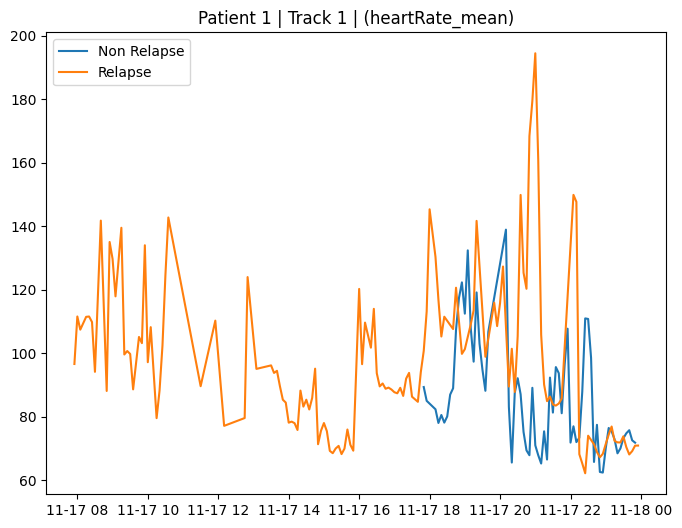

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['heartRate_nanmean'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['heartRate_nanmean'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (heartRate_mean)")

plt.legend()
plt.show()

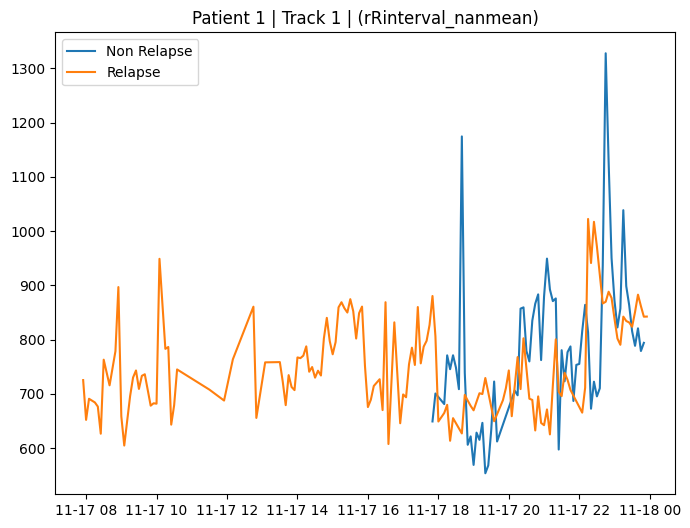

In [16]:
## RR intervals

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['rRInterval_nanmean'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['rRInterval_nanmean'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (rRinterval_nanmean)")

plt.legend()
plt.show()

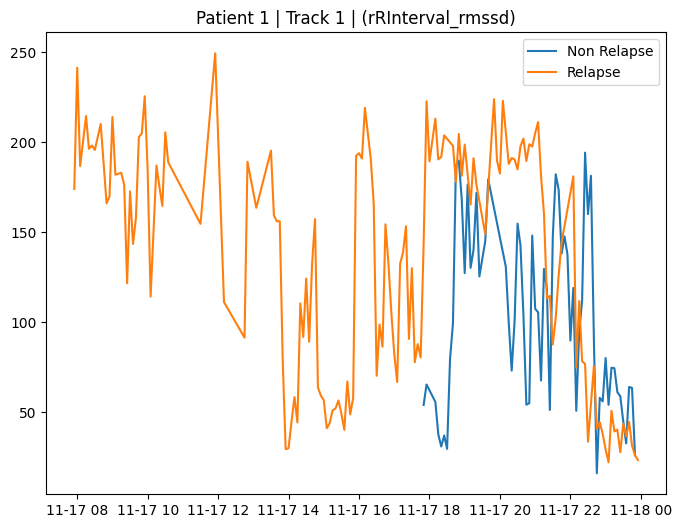

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['rRInterval_rmssd'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['rRInterval_rmssd'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (rRInterval_rmssd)")

plt.legend()
plt.show()

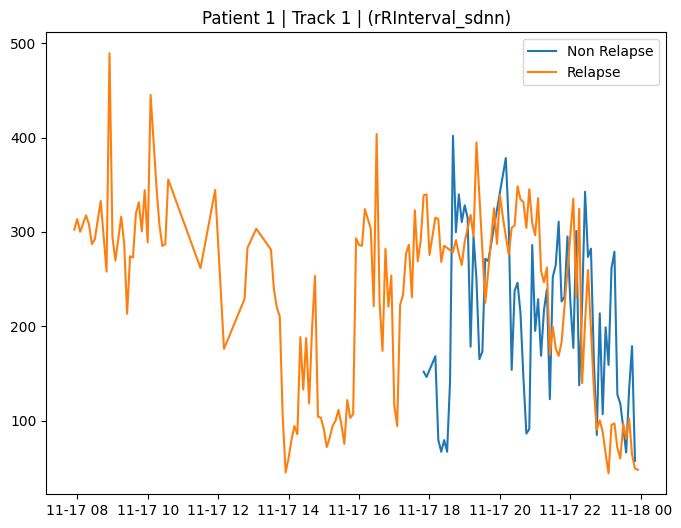

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['rRInterval_sdnn'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['rRInterval_sdnn'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (rRInterval_sdnn)")

plt.legend()
plt.show()

##### 3.2 Acceleration (Linear)

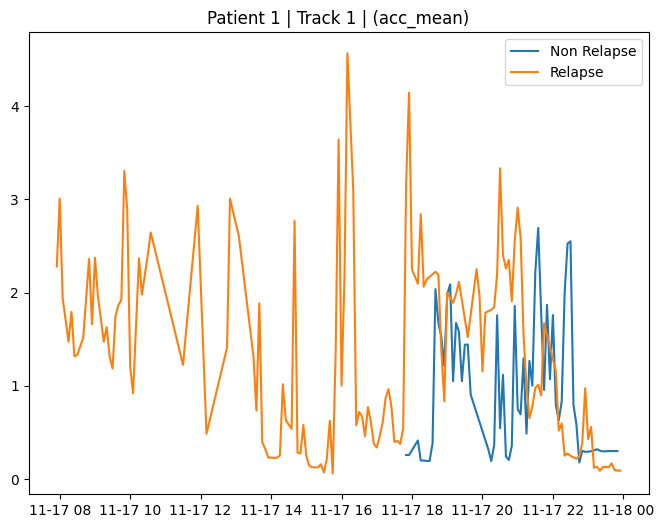

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['acc_mean'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['acc_mean'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (acc_mean)")

plt.legend()
plt.show()

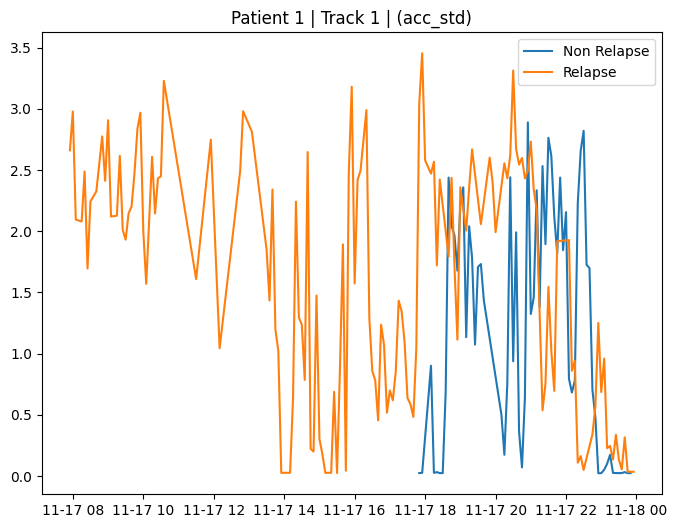

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['acc_std'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['acc_std'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (acc_std)")

plt.legend()
plt.show()

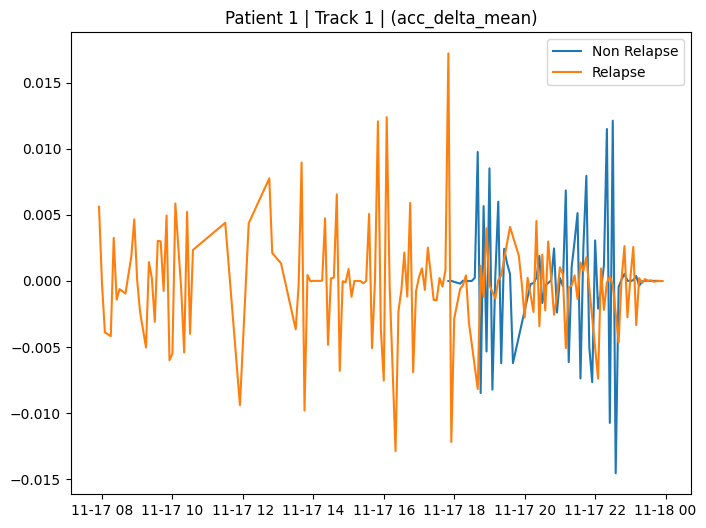

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['acc_delta_mean'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['acc_delta_mean'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (acc_delta_mean)")

plt.legend()
plt.show()

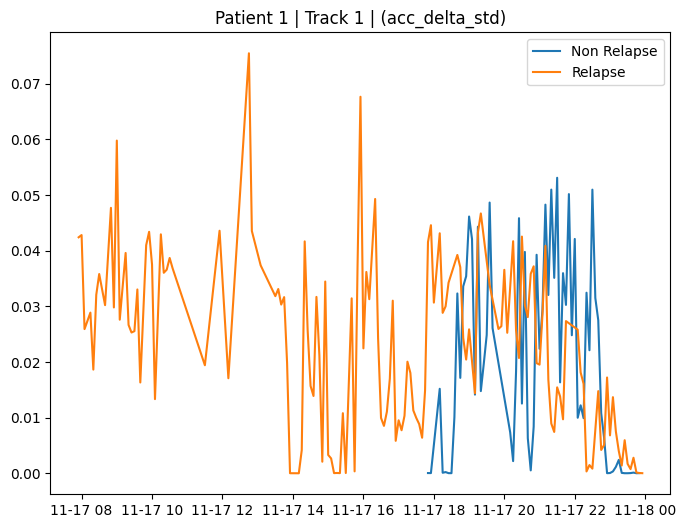

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['acc_delta_std'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['acc_delta_std'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (acc_delta_std)")

plt.legend()
plt.show()

##### 3.3 Gyroscope

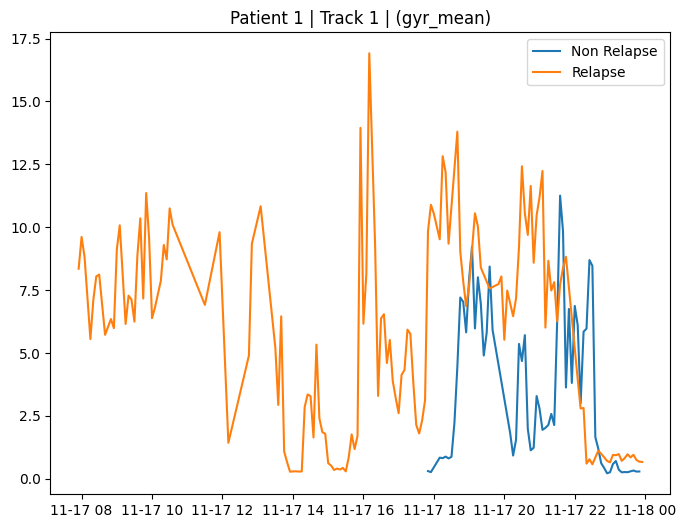

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['gyr_mean'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['gyr_mean'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (gyr_mean)")

plt.legend()
plt.show()

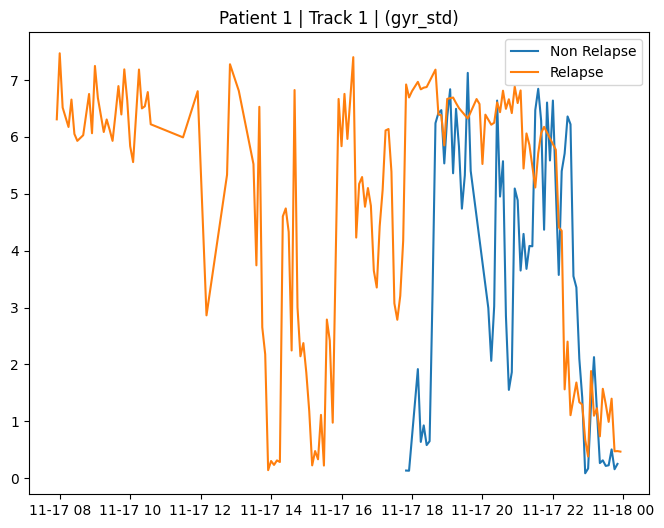

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['gyr_std'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['gyr_std'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (gyr_std)")

plt.legend()
plt.show()

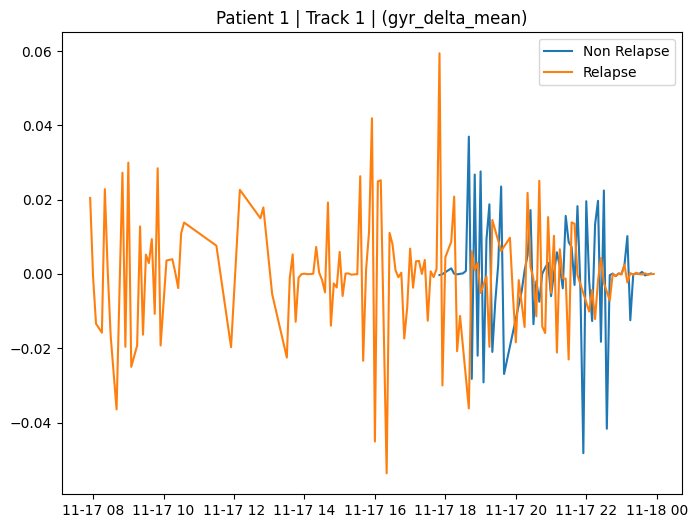

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['gyr_delta_mean'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['gyr_delta_mean'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (gyr_delta_mean)")

plt.legend()
plt.show()

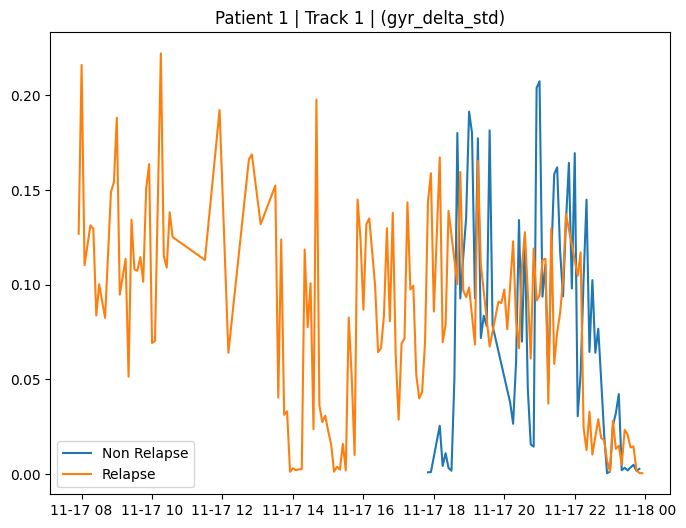

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['gyr_delta_std'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['gyr_delta_std'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (gyr_delta_std)")

plt.legend()
plt.show()